In [ ]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [ ]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.pipeline import Pipeline

### Область работы 2 (поиск  модели .... )

In [3]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# оставляйте свои комментарии и разъяснения
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train_house_B.csv' # содержит только имя файла, без имен папок !!!
df = pd.read_csv(path_train)
df

,price,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
0,2604000,1.222962,0.047686,-1.033389,-2.465344,0.831065,0.802990,1.590989,0.727946,0.893957,...,-0.141322,-0.554035,-1.308863,-0.570187,-0.882735,-0.805741,-0.929397,0.232557,-0.679063,1.307431
1,4900000,-0.091662,-0.356325,-0.486840,-2.465344,-0.126718,-0.024866,-0.323972,1.658337,1.751428,...,-0.141322,-0.554035,0.047278,-0.570187,-0.897850,-0.805741,0.224410,0.864016,1.472618,-0.478408
2,4480000,1.222962,-1.064819,0.338749,0.405623,-0.854973,-0.654330,0.525426,0.585866,-1.661101,...,-0.141322,-0.554035,-1.308863,-0.570187,-0.491114,0.355976,-0.929397,1.118967,1.472618,1.307431
3,3234000,1.222962,-1.570692,-0.696696,0.405623,-0.670784,-0.024866,0.557116,-1.280083,1.273040,...,-0.141322,-0.554035,1.403419,-0.570187,-0.724485,-0.805741,0.224410,0.924687,-0.679063,-0.478408
4,3780000,-1.406286,-1.563680,-1.058295,0.405623,-0.126718,-0.879174,-1.649281,0.496669,0.255596,...,-0.141322,1.804941,0.047278,-0.570187,-0.306965,-0.805741,1.378217,0.170486,-0.679063,-0.478408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,3360000,-0.091662,0.593876,-0.087882,-2.465344,0.077307,0.151482,1.452151,1.772175,-1.264971,...,-0.141322,-0.554035,1.403419,-0.570187,0.454355,-0.805741,1.378217,1.200306,-0.679063,1.307431
404,5950000,-1.406286,0.179794,0.640850,0.405623,-0.126718,-0.975186,-1.028510,0.203867,-1.190658,...,-0.141322,1.804941,0.047278,-0.570187,-1.037904,1.517692,-0.929397,0.960546,-0.679063,-0.478408
405,3675000,-0.091662,1.099966,0.225750,-2.465344,-0.716123,-0.534316,-0.090348,1.151380,1.631097,...,-0.141322,-0.554035,-1.308863,-0.570187,0.477182,-0.805741,-0.929397,-1.512245,-0.679063,1.307431
406,7455000,1.222962,1.498909,-0.392289,0.405623,-0.126718,-0.024866,1.484438,-1.233671,-0.469048,...,-0.141322,-0.554035,0.047278,1.421812,0.407275,0.355976,0.224410,-1.477806,-0.679063,-0.478408


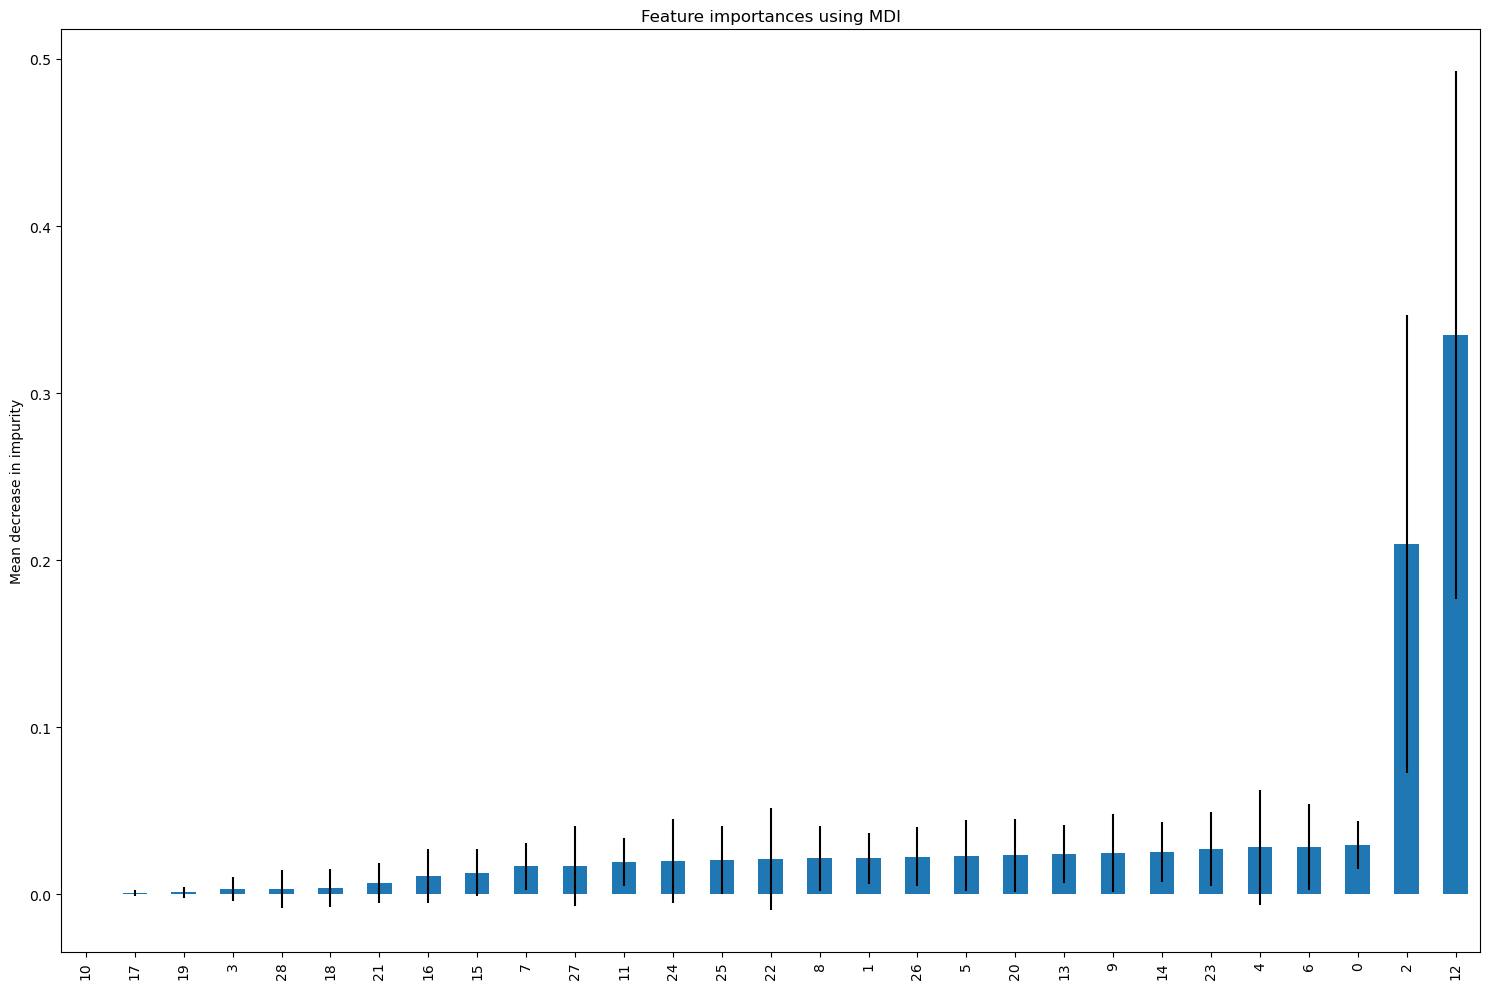

In [4]:

X = df.drop('price', axis=1)
y = df['price']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
forest = RandomForestRegressor(n_estimators=1000, random_state=42)
forest.fit(X_train, y_train)

# Считаем важность
feature_names = X.columns
forest_importances = pd.DataFrame(forest.feature_importances_, index=feature_names, columns=['mean'])
forest_importances['std'] = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

# Сортируем
sort_forest = forest_importances.sort_values(by='mean')

# Рисуем
fig, ax = plt.subplots(figsize=(15,10))
col = sort_forest['mean']
yerr = sort_forest['std']
col.plot.bar(yerr=yerr, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [5]:

X = df.drop('price', axis=1)
y = df['price']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

forest = RandomForestRegressor(n_estimators=1000, random_state=42)
forest.fit(X_train, y_train)

# считаю важность
feature_importances = pd.Series(forest.feature_importances_, index=X.columns)

# щпределяю границу, после которой - данные не важны
threshold = feature_importances.mean() / 10

# нахожу не важные данные
unimportant_features = feature_importances[feature_importances < threshold].index


In [6]:
# и удаляю их
X = X.drop(unimportant_features, axis=1)
X


,0,1,2,4,5,6,7,8,9,11,...,16,18,20,21,22,23,24,25,26,27
0,1.222962,0.047686,-1.033389,0.831065,0.802990,1.590989,0.727946,0.893957,-1.503143,-1.091075,...,-0.465315,-0.263991,-0.554035,-1.308863,-0.570187,-0.882735,-0.805741,-0.929397,0.232557,-0.679063
1,-0.091662,-0.356325,-0.486840,-0.126718,-0.024866,-0.323972,1.658337,1.751428,-1.573310,-1.536530,...,2.149083,-0.263991,-0.554035,0.047278,-0.570187,-0.897850,-0.805741,0.224410,0.864016,1.472618
2,1.222962,-1.064819,0.338749,-0.854973,-0.654330,0.525426,0.585866,-1.661101,1.007304,-0.693173,...,-0.465315,-0.263991,-0.554035,-1.308863,-0.570187,-0.491114,0.355976,-0.929397,1.118967,1.472618
3,1.222962,-1.570692,-0.696696,-0.670784,-0.024866,0.557116,-1.280083,1.273040,-1.163932,1.388846,...,-0.465315,-0.263991,-0.554035,1.403419,-0.570187,-0.724485,-0.805741,0.224410,0.924687,-0.679063
4,-1.406286,-1.563680,-1.058295,-0.126718,-0.879174,-1.649281,0.496669,0.255596,0.928381,0.969821,...,-0.465315,-0.263991,1.804941,0.047278,-0.570187,-0.306965,-0.805741,1.378217,0.170486,-0.679063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,-0.091662,0.593876,-0.087882,0.077307,0.151482,1.452151,1.772175,-1.264971,-1.352937,1.572713,...,-0.465315,-0.263991,-0.554035,1.403419,-0.570187,0.454355,-0.805741,1.378217,1.200306,-0.679063
404,-1.406286,0.179794,0.640850,-0.126718,-0.975186,-1.028510,0.203867,-1.190658,0.955389,1.303912,...,2.149083,-0.263991,1.804941,0.047278,-0.570187,-1.037904,1.517692,-0.929397,0.960546,-0.679063
405,-0.091662,1.099966,0.225750,-0.716123,-0.534316,-0.090348,1.151380,1.631097,0.673274,1.504070,...,-0.465315,-0.263991,-0.554035,-1.308863,-0.570187,0.477182,-0.805741,-0.929397,-1.512245,-0.679063
406,1.222962,1.498909,-0.392289,-0.126718,-0.024866,1.484438,-1.233671,-0.469048,-1.250468,-0.275399,...,-0.465315,-0.263991,-0.554035,0.047278,1.421812,0.407275,0.355976,0.224410,-1.477806,-0.679063


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
unimportant_features

Index(['3', '10', '17', '19', '28'], dtype='object')

           0         1         2         4         5         6         7  \
0   1.000000 -0.105334 -0.180131  0.000736  0.056038  0.040782  0.102345   
1  -0.105334  1.000000  0.128683  0.057467  0.004717  0.014808 -0.044145   
2  -0.180131  0.128683  1.000000  0.260241 -0.235658  0.049358 -0.023237   
4   0.000736  0.057467  0.260241  1.000000  0.218964 -0.009105  0.031123   
5   0.056038  0.004717 -0.235658  0.218964  1.000000 -0.034779  0.003780   
6   0.040782  0.014808  0.049358 -0.009105 -0.034779  1.000000 -0.093288   
7   0.102345 -0.044145 -0.023237  0.031123  0.003780 -0.093288  1.000000   
8  -0.104896 -0.014551 -0.014880  0.075324  0.098682  0.024148  0.012919   
9   0.056612  0.049353  0.037207 -0.051585 -0.086837 -0.001988  0.067720   
11 -0.055793 -0.044184 -0.065532  0.080315  0.046662 -0.040231 -0.038496   
12 -0.071993  0.048726  0.517711  0.665892  0.180740 -0.010297  0.008636   
13  0.095986  0.064644  0.006567 -0.015724 -0.036639  0.122147 -0.034767   
14 -0.033083

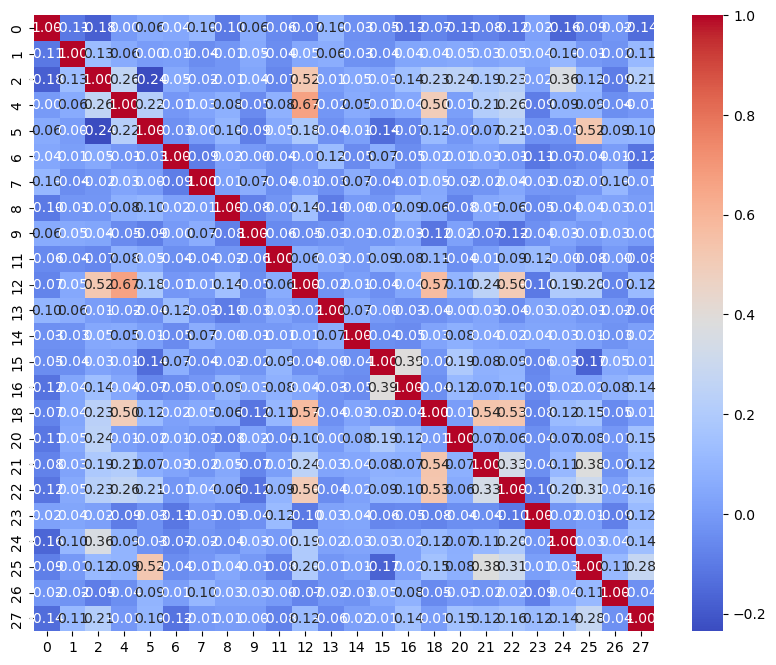

In [9]:
# посмотрю на матрицу корреляции - вдруг надо что-то еще убрать
corr_matrix = X.corr()
print(corr_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()
# все хорошо

In [10]:
# теперь выберу модель

In [11]:
### RIDGE

In [12]:
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(random_state=42))
])

param_grid = {
    'ridge__alpha': [0.1, 1.0, 10.0, 100.0, 1000.0], 
    'ridge__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'ridge__max_iter': [5000, 10000, 20000, 50000]
}

grid_search = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring='neg_mean_absolute_percentage_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее значение метрики (отрицательный MAPE):", grid_search.best_score_)
best_ridge = grid_search.best_estimator_

y_pred_ridge = best_ridge.predict(X_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_ridge)
print("MAPE на тестовом наборе:", mape_test)


Лучшие параметры: {'ridge__alpha': 10.0, 'ridge__max_iter': 5000, 'ridge__solver': 'saga'}
Лучшее значение метрики (отрицательный MAPE): -0.1854082084248371
MAPE на тестовом наборе: 0.16903078677423616


In [13]:
### KNN

In [14]:
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 20], 
    'knn__weights': ['uniform', 'distance'], 
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'knn__p': [1, 2]  
}

grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='neg_mean_absolute_percentage_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее значение метрики (отрицательный MAPE):", grid_search.best_score_)

best_knn = grid_search.best_estimator_

y_pred_knn = best_knn.predict(X_test)

mape_test = mean_absolute_percentage_error(y_test, y_pred_knn)
print("MAPE на тестовом наборе:", mape_test)


/Users/natalakudrinskaa/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Лучшие параметры: {'knn__algorithm': 'auto', 'knn__n_neighbors': 20, 'knn__p': 1, 'knn__weights': 'distance'}
Лучшее значение метрики (отрицательный MAPE): -0.237989402025588
MAPE на тестовом наборе: 0.25642016288343356


In [15]:
### ADA BOOST

In [16]:
ada_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('adaboost', AdaBoostRegressor(random_state=42))
])

param_grid = {
    'adaboost__n_estimators': [50, 100, 200], 
    'adaboost__learning_rate': [0.01, 0.1, 1, 1.5, 2], 
    'adaboost__loss': ['linear', 'square', 'exponential'],
    'adaboost__estimator': [DecisionTreeRegressor(max_depth=1000)] 
}

grid_search = GridSearchCV(ada_pipeline, param_grid, cv=5, scoring='neg_mean_absolute_percentage_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее значение метрики (отрицательный MAPE):", grid_search.best_score_)

best_ada = grid_search.best_estimator_

y_pred_ada = best_ada.predict(X_test)

mape_test = mean_absolute_percentage_error(y_test, y_pred_ada)
print("MAPE на тестовом наборе:", mape_test)


Лучшие параметры: {'adaboost__estimator': DecisionTreeRegressor(max_depth=1000), 'adaboost__learning_rate': 1.5, 'adaboost__loss': 'exponential', 'adaboost__n_estimators': 200}
Лучшее значение метрики (отрицательный MAPE): -0.19046599138159737
MAPE на тестовом наборе: 0.20854172505429408
